## **대출등급 데이터 (DACON)**

### **1. 패키지 설치 및 데이터 로드**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\0.preprocessing\datasets\train(신용등급).csv')
data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


### **2. 데이터 확인**

- target : 대출등급

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


> ID는 대출등급에 영향을 미치지 않는 요소이므로 삭제해도 될 듯하다. <br>
> object형은 one-hot encoding이 필요해보인다. <br>
> 결측치는 없는 것으로 확인.

### **3. 데이터 전처리**

#### 3-1. 종속변수 대출등급 분리

In [4]:
data1 = data.copy()
data1.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [5]:
y = data1['대출등급']
X = data1.drop('대출등급', axis=1)

In [6]:
X.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0


#### 3-2. ID 컬럼 삭제

In [7]:
X= X.drop('ID', axis=1)
X.head(3)

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0


> ID 컬럼 삭제

#### 3-3. object형은 one-hot Encoding 진행

In [8]:
# 카테고리형 컬럼만 추출
cate_cols = X.select_dtypes('object').columns
cate_cols

Index(['대출기간', '근로기간', '주택소유상태', '대출목적'], dtype='object')

In [9]:
for i in cate_cols:
    print('## {0} ##'.format(i))
    print(X[i].value_counts())

## 대출기간 ##
대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64
## 근로기간 ##
근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64
## 주택소유상태 ##
주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64
## 대출목적 ##
대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64


> 대출기간은 36months, 60months 2가지 유형 <br>
> 주택소유상태는 MORTGAGE, RENT, OWN, ANY  4가지 유형 <br>
> 대출목적은 부채 통합, 신용 카드, 주택 개선 , 기타, 주요 구매, 의료, 자동차, 소규모 사업, 이사, 휴가, 주택, 재생 에너지 12가지 유형 

> 근로기간은 골치 아프다.... <br>
10+ years    31585 <br>
2 years       8450 <br>
< 1 year      7774 <br>
3 years       7581 <br>
1 year        6249 <br>
Unknown       5671 <br>
5 years       5665 <br>
4 years       5588 <br>
8 years       4888 <br>
6 years       3874 <br>
7 years       3814 <br>
9 years       3744 <br>
10+years       896 <br>
<1 year        370 <br>
3               89 <br>
1 years         56 <br>

> <1year와 < 1 year는 < 1 year로 합칠 것.
> 1 years와 1 year은 1 years로 합칠 것.
> 3은 3 years와는 3 years로 합칠 것. 
> 10+ years와 10+years는 10+ years로 합칠 것

In [10]:
def Change(x):
    if x == '<1 year':
        return '< 1 year'
    elif x == '1 year':
        return '1 years'
    elif x == '3':
        return '3 years'
    elif x == '10+years':
        return '10+ years'
    else:
        return x

X['근로기간'] = X['근로기간'].apply(Change)

In [11]:
X['근로기간'].value_counts()

근로기간
10+ years    32481
2 years       8450
< 1 year      8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [12]:
X[cate_cols]

,대출기간,근로기간,주택소유상태,대출목적
0,36 months,6 years,RENT,부채 통합
1,60 months,10+ years,MORTGAGE,주택 개선
2,36 months,5 years,MORTGAGE,부채 통합
3,36 months,8 years,MORTGAGE,부채 통합
4,60 months,Unknown,RENT,주요 구매
...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드
96290,60 months,10+ years,MORTGAGE,주택 개선
96291,36 months,1 years,MORTGAGE,신용 카드
96292,36 months,5 years,MORTGAGE,부채 통합


In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X[cate_cols])

In [14]:
# OneHotEncoder가 변환한 특성의 이름을 가져옴
feature_names = ohe.get_feature_names_out(input_features=cate_cols)

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=feature_names)
X_encoded_df

,대출기간_ 36 months,대출기간_ 60 months,근로기간_1 years,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96290,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96291,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3-4. 연속형 변수 컬럼 + encoding된 범주형 변수 컬럼 합치기

In [15]:
num_cols = X.select_dtypes(np.number).columns
num_cols

Index(['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수'],
      dtype='object')

In [16]:
X[num_cols]

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0
1,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
96289,14400000,210000000,9.33,33,0,974580,492168.0,0.0,0.0
96290,28800000,132000000,5.16,25,0,583728,855084.0,0.0,0.0
96291,14400000,84000000,11.24,22,0,1489128,241236.0,0.0,0.0
96292,15600000,66330000,17.30,21,2,1378368,818076.0,0.0,0.0


In [17]:
df = pd.merge(X[num_cols], X_encoded_df, left_index=True, right_index=True)
df

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출기간_ 36 months,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,210000000,9.33,33,0,974580,492168.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96290,28800000,132000000,5.16,25,0,583728,855084.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96291,14400000,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96292,15600000,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3-5. scaling진행

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [19]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head(3)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출기간_ 36 months,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.276471,0.006667,0.001890,0.066667,0.0,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.323529,0.012111,0.002233,0.103030,0.0,0.008904,0.041402,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.264706,0.008889,0.000860,0.060606,0.0,0.022134,0.026876,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **4. 학습 테스트 셋 분리**

In [20]:
len(scaled_df)

96294

#### 4-1. 종속변수는 등급에 따라 Labeling

In [21]:
y.value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [22]:
y = y.map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})
y.value_counts()

대출등급
2    28817
3    27623
1    16772
4    13354
5     7354
6     1954
7      420
Name: count, dtype: int64

#### 4-2. train data, validation data, test data 분리

In [23]:
# 학습 데이터와 테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(scaled_df, y, test_size=0.3, random_state=123)

# 학습 데이터와 validation 데이터 분리
train_X_all, val_X, train_y_all, val_y = train_test_split(train_X, train_y, test_size=0.2 ,random_state=123)

print('학습 데이터:', train_X_all.shape, train_y_all.shape)
print('교차검증데이터:', val_X.shape, val_y.shape)
print('테스트 데이터:', test_X.shape, test_y.shape)

학습 데이터: (53924, 39) (53924,)
교차검증데이터: (13481, 39) (13481,)
테스트 데이터: (28889, 39) (28889,)


In [24]:
val_X.values

array([[0.55882353, 0.00722222, 0.00122012, ..., 0.        , 1.        ,
        0.        ],
       [0.06544118, 0.00655556, 0.00334033, ..., 0.        , 0.        ,
        0.        ],
       [0.70588235, 0.007     , 0.00165517, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26470588, 0.005     , 0.00328333, ..., 0.        , 0.        ,
        0.        ],
       [0.50588235, 0.00622222, 0.0010221 , ..., 0.        , 0.        ,
        0.        ],
       [0.14705882, 0.00333333, 0.00217622, ..., 0.        , 0.        ,
        0.        ]])

### **5. 모델링 진행**


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### 5-1. KNeighborsClassifier
- 최적의 k를 찾으며, 거리에 따른 가중치를 주기로 함.

In [27]:
accuracy_scores = []

for k in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski')
    knn.fit(train_X_all, train_y_all)
    pred = knn.predict(val_X.values)
    print('정확도:', accuracy_score(val_y, pred))
    accuracy_scores.append(accuracy_score(val_y, pred))

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.3610266300719531


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.35168014242266893


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.36748015725836364


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.36792522809880573


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.36933461909353904


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.37089236703508643


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.373488613604332


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


정확도: 0.3725984719234478


In [28]:
accuracy_scores

[0.3610266300719531,
 0.35168014242266893,
 0.36748015725836364,
 0.36792522809880573,
 0.36933461909353904,
 0.37089236703508643,
 0.373488613604332,
 0.3725984719234478]

- 시각화 

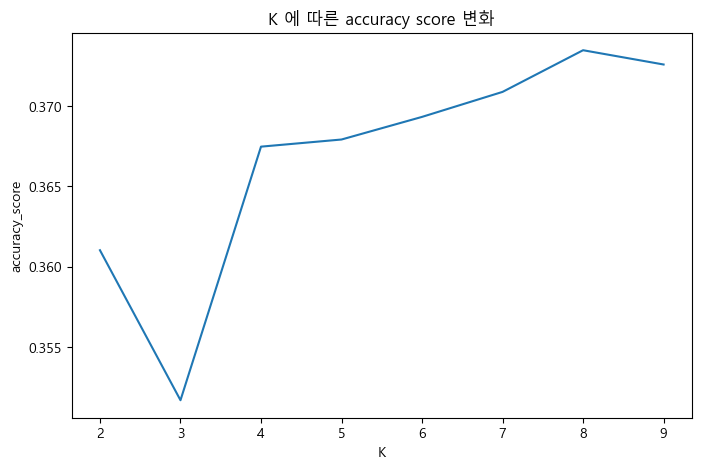

In [29]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

plt.figure(figsize=(8,5))
plt.title("K 에 따른 accuracy score 변화")
plt.plot(list(range(2,10)), accuracy_scores )
plt.xlabel('K')
plt.ylabel('accuracy_score')
plt.show()

> Optimal K = 8로 확인

- K=8로 하여 다시 모델링 진행 후 평가

In [30]:
knn = KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='uniform')
knn.fit(train_X, train_y)
pred = knn.predict(test_X.values)
print('K=8일때, 정확도:', accuracy_score(test_y, pred)) 

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


K=8일때, 정확도: 0.37789470040499845


> K=8일때, 정확도: 0.37789470040499845 

#### 5-2. DecisionTreeClassifier

In [31]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

grid_cv = GridSearchCV(dt, 
                       param_grid={'max_depth':[5,7,9,11], 
                                   'min_samples_split':[10,12,15,18],
                                   'criterion': ['gini', 'entropy']},
                        scoring='accuracy',
                        cv=5,
                        verbose=1)

grid_cv.fit(train_X, train_y)

print('GridSearchCV 최적 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
grid_cv.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
GridSearchCV 최적 평균 정확도 수치: 0.7881462799495587
GridSearchCV 최적 파라미터: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12}


DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=12)

In [32]:
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df[['param_max_depth', 'param_min_samples_split',  'param_criterion', 'mean_test_score']].sort_values('mean_test_score')

,param_max_depth,param_min_samples_split,param_criterion,mean_test_score
17,5,12,entropy,0.454091
18,5,15,entropy,0.454091
19,5,18,entropy,0.454091
16,5,10,entropy,0.454091
0,5,10,gini,0.476745
3,5,18,gini,0.476745
2,5,15,gini,0.476745
1,5,12,gini,0.476745
22,7,15,entropy,0.588265
21,7,12,entropy,0.588265


> 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12 으로 다시 모델링 진행

In [33]:
dt = DecisionTreeClassifier(max_depth=11, min_samples_split=12, criterion='entropy')
dt.fit(train_X, train_y)
pred = dt.predict(test_X.values)
print('criterion=entropy, max_depth=11, min_samples_split=12 일때:', accuracy_score(test_y, pred))

criterion=entropy, max_depth=11, min_samples_split=12 일때: 0.7721277995084634


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


> criterion=entropy, max_depth=11, min_samples_split=12 일때: 0.7721277995084634

#### 5-3. RandomForestClassifier
- 1. RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()


grid_cv = GridSearchCV(rf,
                       param_grid={'max_depth':[8,16,24],
                                   })

- 2. Gradient Boosting

- 3. XGBoosting

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()


- 4. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

#### 5-4. Logistic Regression

In [36]:
lr_reg = LogisticRegression()
grid_cv = GridSearchCV(lr_reg,
                       param_grid={'penalty':['l1', 'l2','elasticnet'],
                                   'C':[0.001, 0.01, 0.1, 1.0], 
                                   'solver':['lbfgs','newton-cg','liblinear'],
                                   'max_iter': [500,800,1000]},
                       scoring='accuracy',
                       cv=5,
                       verbose=1)

grid_cv.fit(train_X, train_y)

print('GridSearchCV 최적 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
grid_cv.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

GridSearchCV 최적 평균 정확도 수치: 0.45434314961798083
GridSearchCV 최적 파라미터: {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')

In [40]:
logit_result_df = pd.DataFrame(grid_cv.cv_results_)
logit_result_df[['param_C', 'param_max_iter', 'param_penalty', 'param_solver', 'mean_test_score']].sort_values('mean_test_score')

,param_C,param_max_iter,param_penalty,param_solver,mean_test_score
2,0.001,500,l1,liblinear,0.348713
11,0.001,800,l1,liblinear,0.348713
20,0.001,1000,l1,liblinear,0.348713
5,0.001,500,l2,liblinear,0.351621
14,0.001,800,l2,liblinear,0.351621
...,...,...,...,...,...
99,1.0,1000,l1,lbfgs,NaN
100,1.0,1000,l1,newton-cg,NaN
105,1.0,1000,elasticnet,lbfgs,NaN
106,1.0,1000,elasticnet,newton-cg,NaN


> {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'} 로 다시 모델링 진행

In [41]:
lr_reg2 = LogisticRegression(max_iter=500, penalty='l1', C=1.0, solver='liblinear')
lr_reg2.fit(train_X, train_y)
pred = lr_reg2.predict(test_X)
print('C =1.0, max_iter=500, penalty=l1, solver=liblinear 일때 logisitic regression accuracy:', accuracy_score(test_y, pred))

C =1.0, max_iter=500, penalty=l1, solver=liblinear 일때 logisitic regression accuracy: 0.45231749108657276


#### 5-5. SVM

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svm = SVC(max_iter=1000)

grid_cv = GridSearchCV(svm, 
                       param_grid={'C':[0.01,0.1,1.0],
                                   'gamma':[0.5,1,5,10],
                                   'kernel':['linear', 'rbf'],
                                   'degree':[2,3,4],
                                   },
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=5,
                        verbose=1)

grid_cv.fit(train_X, train_y)
print('GridSearchCV 최적 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
grid_cv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
grid_cv.cv_results_

### 6. 최종 모델